# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Imam Agus Faisal
- Email: imamagusfaisal120@gmail.com
- Id Dicoding: imamaf

## Persiapan

### Menyiapkan library yang dibutuhkan

In [102]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 

### Menyiapkan data yang akan digunakan

In [103]:
df = pd.read_csv('employee_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Cleaning Data

In [104]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [106]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


## Data Understanding

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

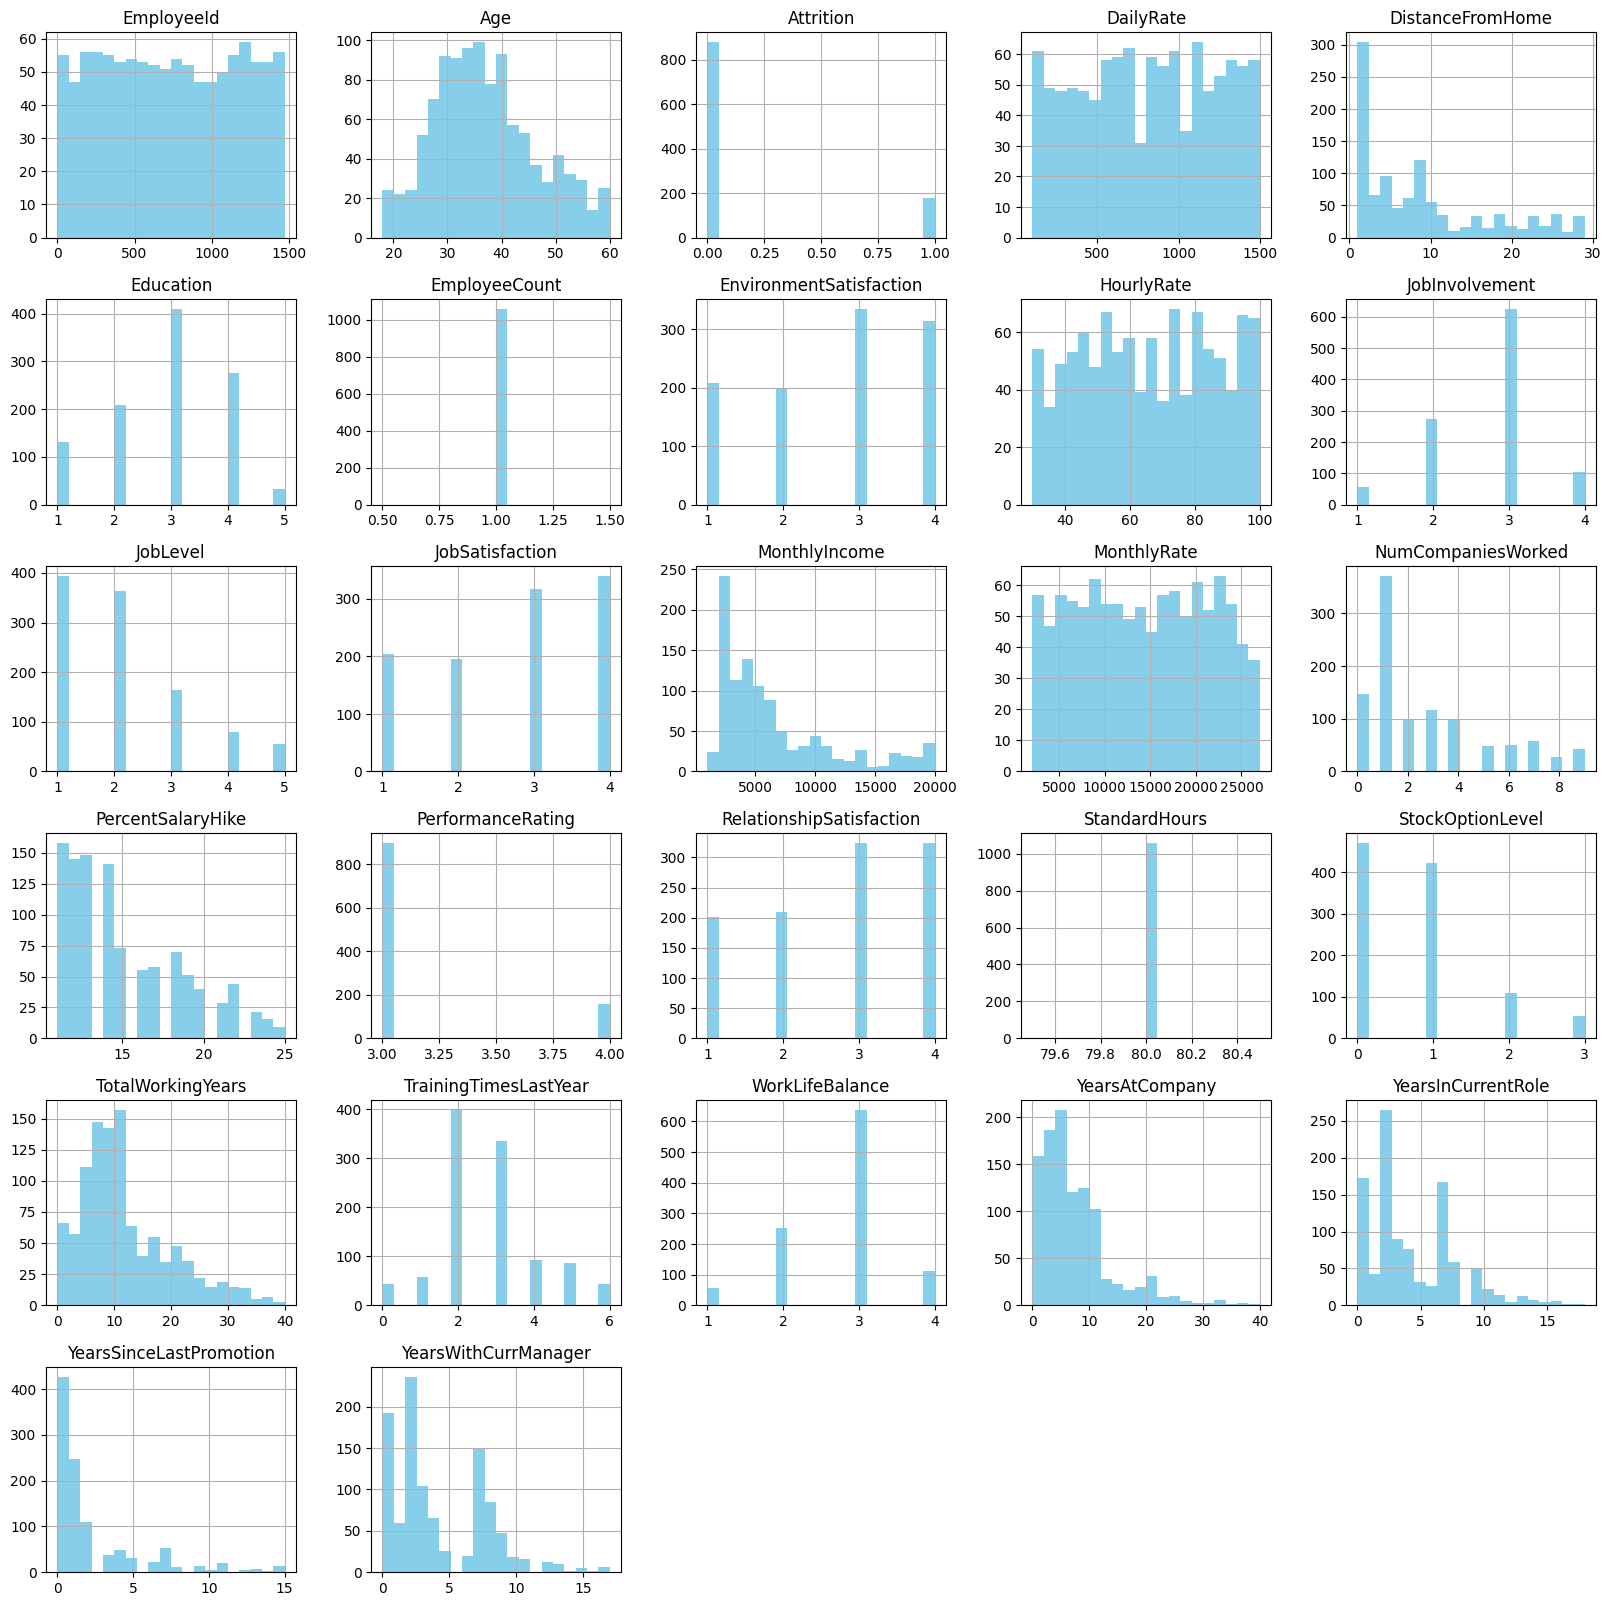

In [107]:
df.hist(bins=20, figsize=(20, 20), color='skyblue')
plt.show()

#### Multivariate Analysis

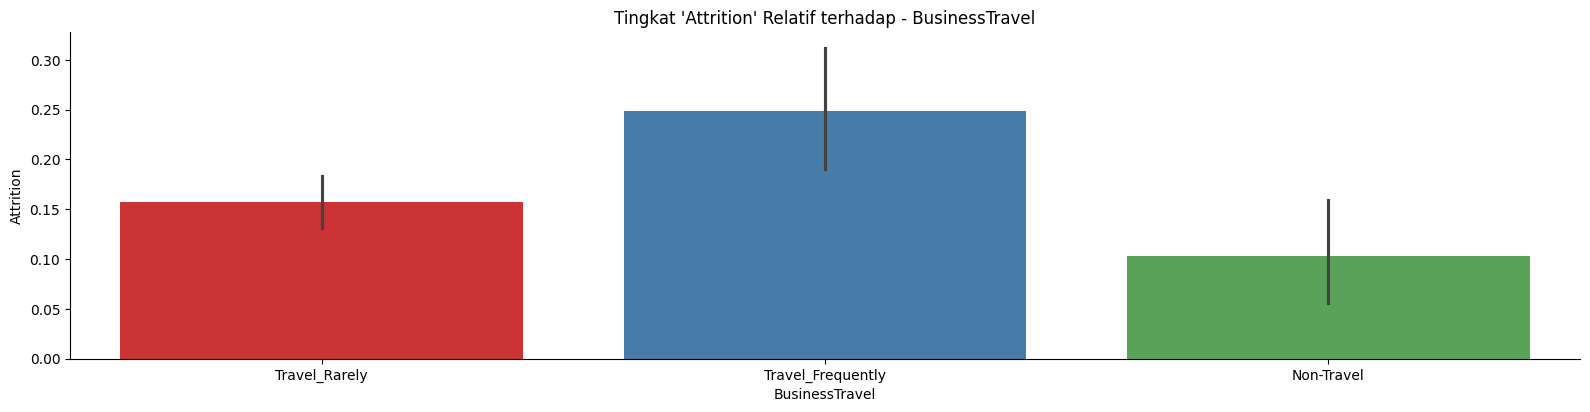

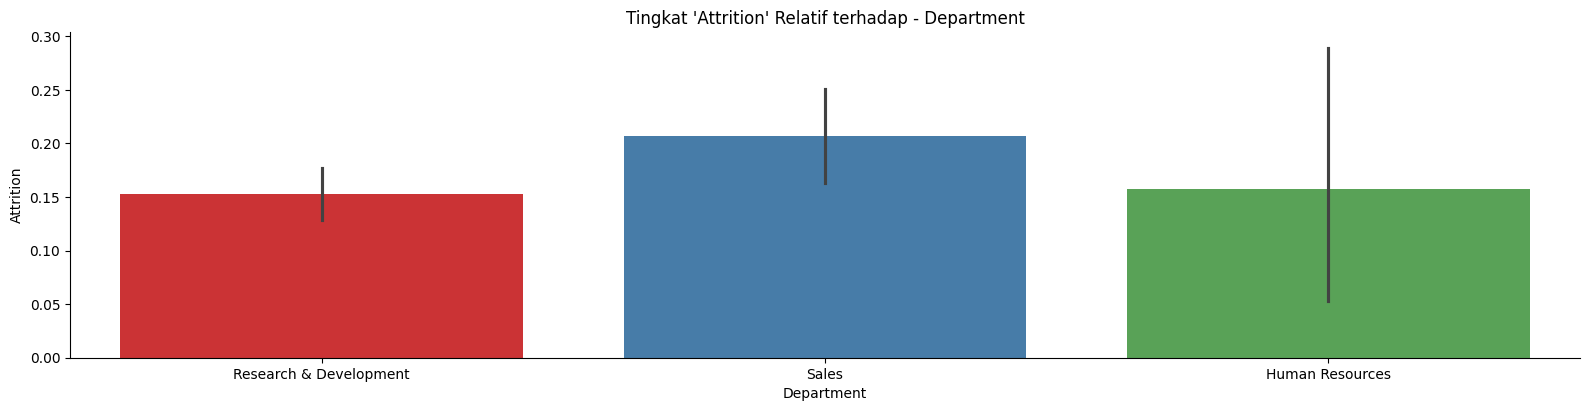

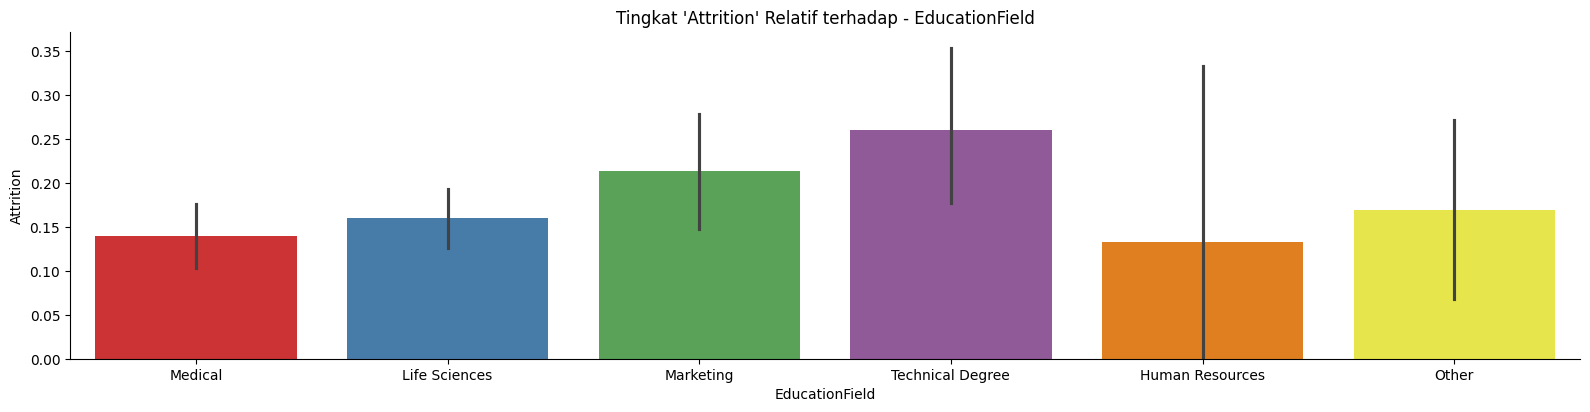

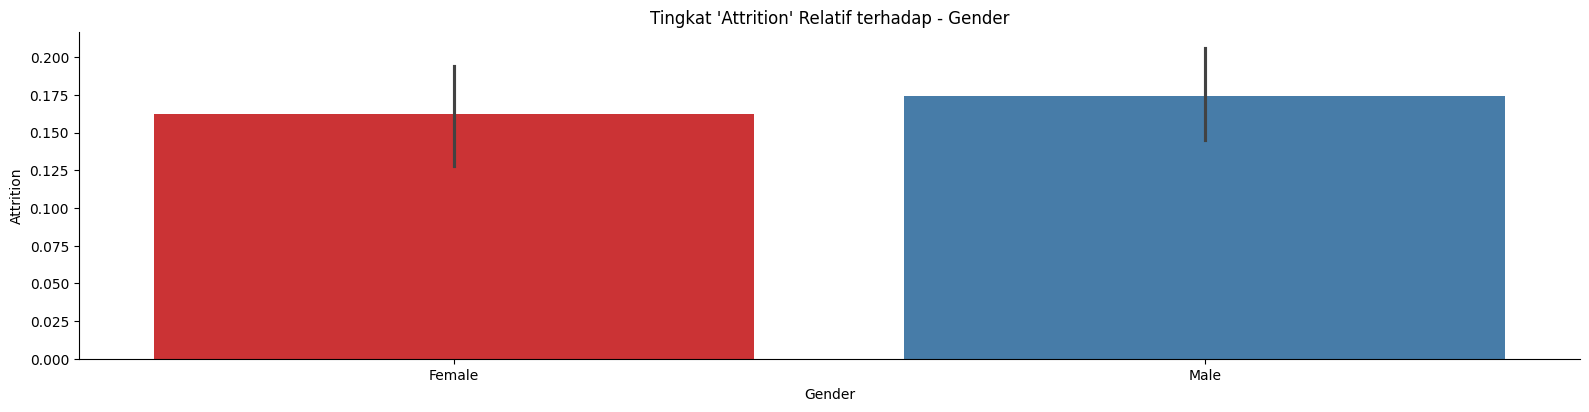

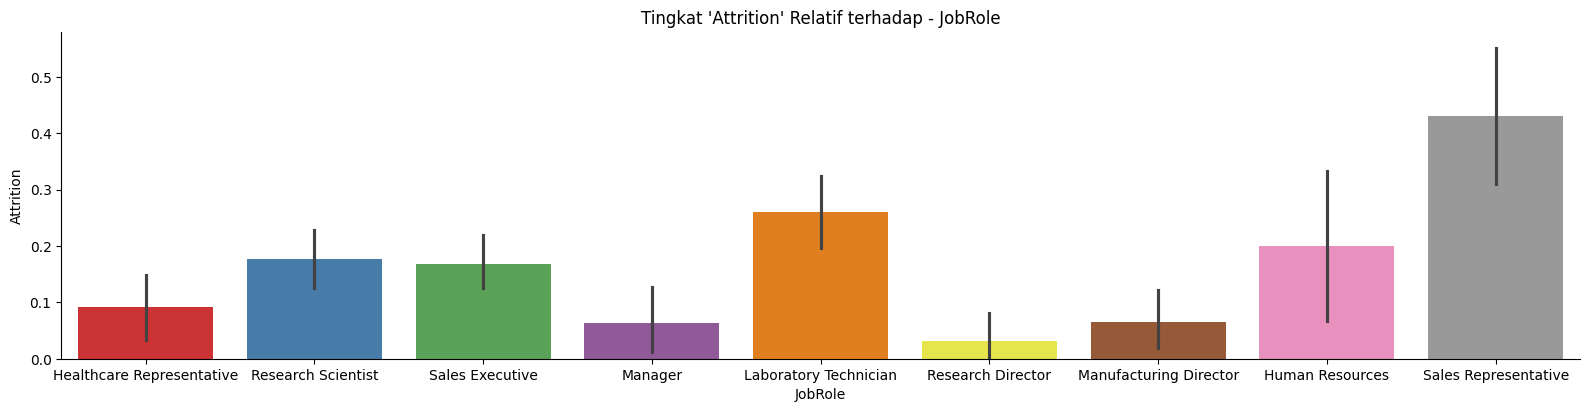

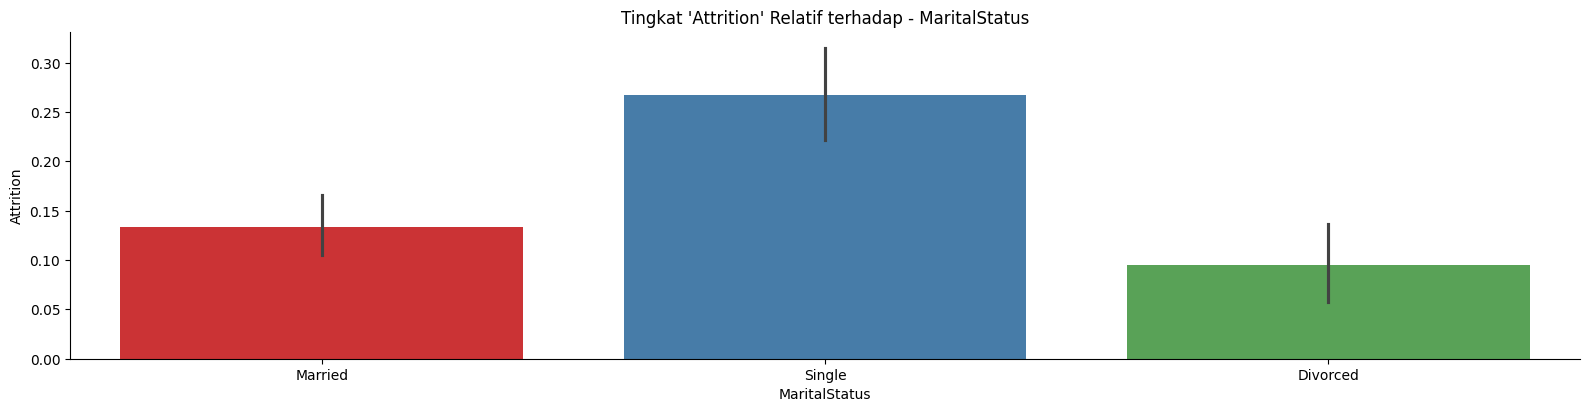

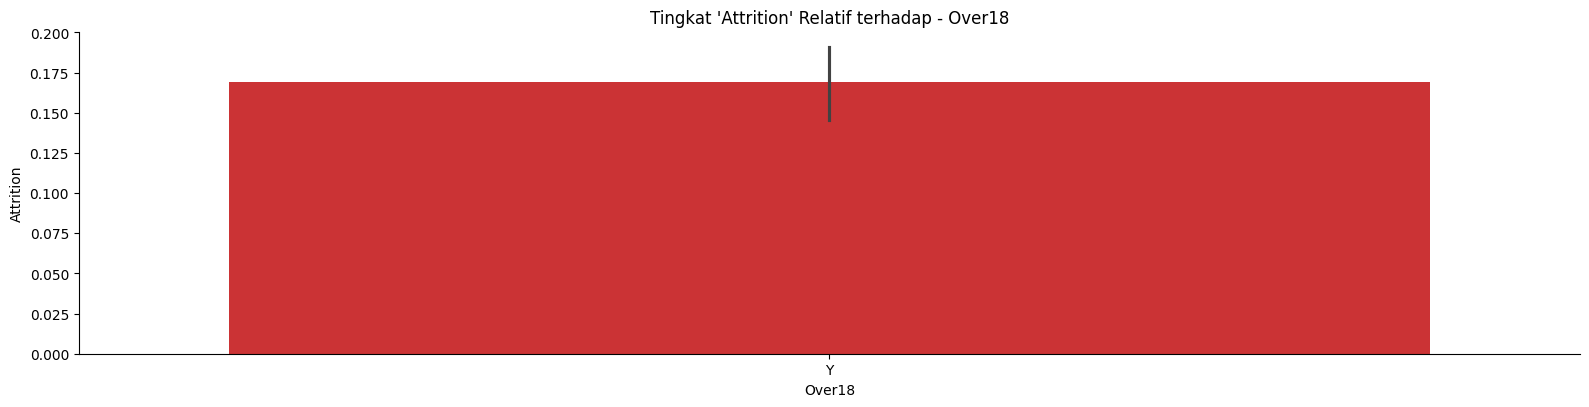

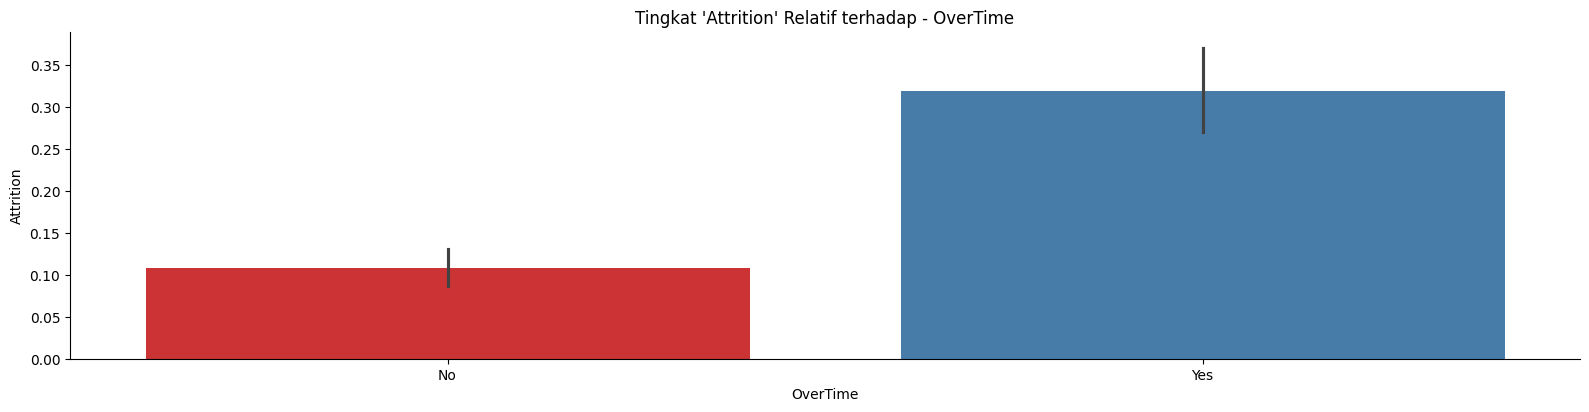

In [108]:
att_features = df.select_dtypes(include='object').columns.to_list()
 
for col in att_features:
  sns.catplot(x=col, y="Attrition", hue=col, kind="bar", dodge=False, height = 4, aspect = 4,  data=df, palette="Set1", legend=False)
  plt.title("Tingkat 'Attrition' Relatif terhadap - {}".format(col))

Untuk menganalisis korelasi, kita harus mengubah tipe object menjadi angka dengan Encoder

In [109]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in df.columns:
    # Check if the column data type is object (string)
    if df[column].dtype == 'object':
        # Encode the string values to numeric values
        df[column] = label_encoder.fit_transform(df[column])

# Print the updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   int64  
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   int64  
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   int64  
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   int64  
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

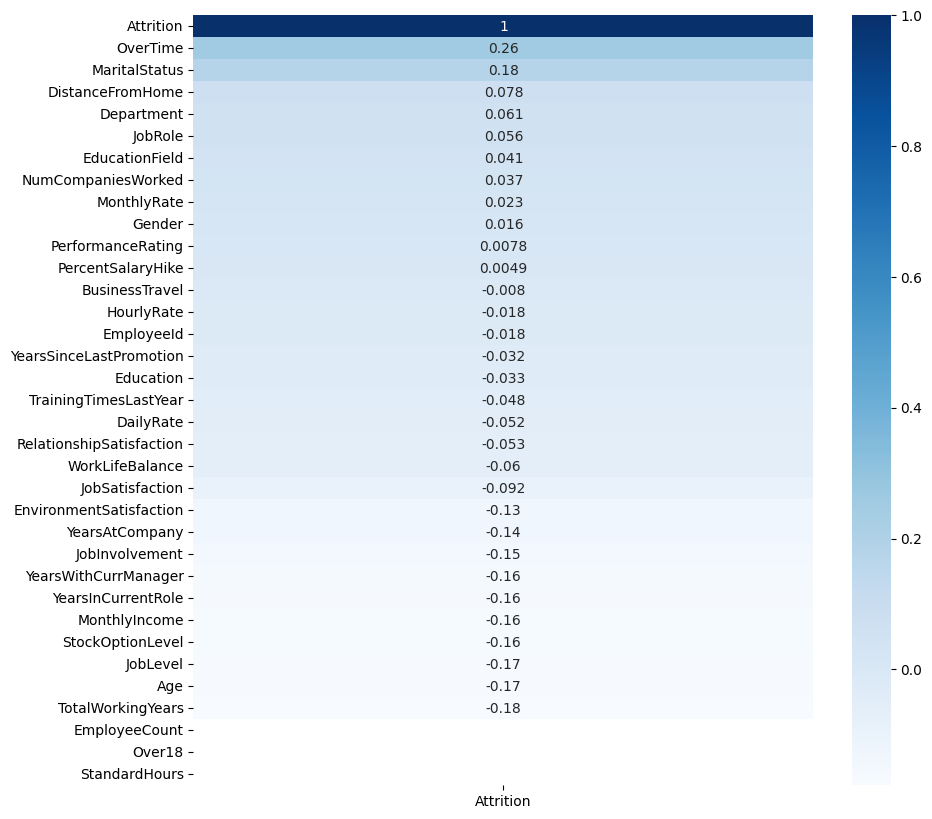

In [110]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation matrix to include only the columns that have correlation with 'Attrition'
correlation_with_attrition = correlation_matrix['Attrition']

# Sort the correlation values in descending order
correlation_with_attrition_sorted = correlation_with_attrition.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_with_attrition_sorted.to_frame(), annot=True, cmap='Blues')

# Display the plot
plt.show()


Kita akan mengurangi data pada kolom yang tidak terlalu berpengaruh pada Attrition, yaitu |x|<10%.
Perlu diingat bahwa korelasi negatif juga sangat penting.

>> **NOTE:** Data pada dataset tidak menunjukkan korelasi yang signifikan, baik itu korelasi Positif ataupun Negatif. Data korelasi terbesar hanya 0.26 atau 26%, yaitu antara Attriction dengan OverTime. Hal tersebut akan mempengaruhi model kedepannya dalam melakukan prediksi dan akurasi prediksi akan rendah.

In [111]:
bad_corr = ['DistanceFromHome', 'Department', 'JobRole', 'EducationField', 'NumCompaniesWorked', 'MonthlyRate', 'Gender', 'PerformanceRating', 'PercentSalaryHike', 'BusinessTravel', 'HourlyRate', 'EmployeeId', 'YearsSinceLastPromotion', 'Education', 'TrainingTimesLastYear', 'DailyRate', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobSatisfaction', 'EmployeeCount', 'Over18', 'StandardHours']

df.drop(bad_corr, axis=1, inplace=True)

## Data Preparation / Preprocessing

### Select Label and Features

In [112]:
# Select features and target
target = 'Attrition'
features = ['Age',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

 # Prepare x and y
x = df[features].values
y = df[target].values

### Split into Train and Test

In [113]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

### Standarize Features

In [114]:
# Standardize numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Simpan scaler menggunakan pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Modeling

### Define Callbacks

In [115]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("Accuracy above 95%")
            self.model.stop_training = True

callbacks = myCallback()

### Create Model

In [116]:
# Build Neural Network
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 256)               3328      
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dense_77 (Dense)            (None, 128)               16512     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 64)                8256      
                                                                 
 dense_79 (Dense)            (None, 64)                4160      
                                                                 
 dropout_30 (Dropout)        (None, 64)              

### Train Model

In [117]:
# Train the model
history = model.fit(
    x_train, y_train, 
    validation_split=0.3,
    epochs=100, 
    batch_size=32, 
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/100


21/21 [==============================] - 3s 16ms/step - loss: 0.6998 - accuracy: 0.5360 - val_loss: 0.6634 - val_accuracy: 0.8182
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5864 - accuracy: 0.8318 - val_loss: 0.4709 - val_accuracy: 0.8182
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4642 - accuracy: 0.8378 - val_loss: 0.4481 - val_accuracy: 0.8182
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4040 - accuracy: 0.8438 - val_loss: 0.4335 - val_accuracy: 0.8182
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3806 - accuracy: 0.8423 - val_loss: 0.4406 - val_accuracy: 0.8182
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3742 - accuracy: 0.8423 - val_loss: 0.4477 - val_accuracy: 0.8182
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3644 - accuracy: 0.8438 - val_loss: 0.4326 - val_accuracy: 0.8182
Epoch 8/100
21/21 [=====

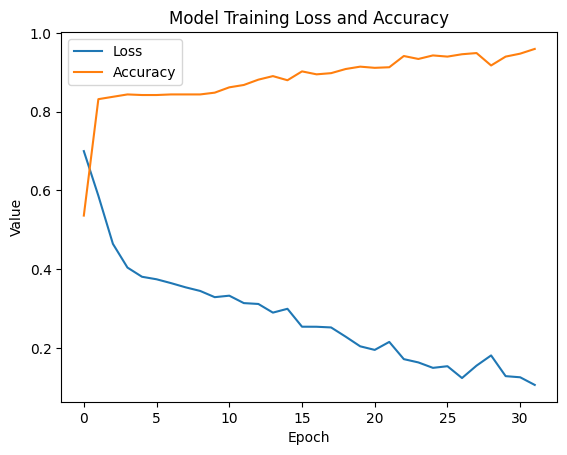

In [118]:
# Plotting the training loss and accuracy
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

## Evaluation

### Test Model
Model ditest dengan data yang belum pernah diberikan

In [119]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 [==============================] - 0s 4ms/step - loss: 1.2103 - accuracy: 0.8302
Test Accuracy: 0.83


In [120]:
# Predict on test set
y_pred = (model.predict(x_test) > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


Melihat Precision, Recall, F1, dan Support Score

In [121]:
# Display metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        83
         1.0       0.67      0.43      0.53        23

    accuracy                           0.83       106
   macro avg       0.76      0.69      0.71       106
weighted avg       0.82      0.83      0.82       106



### Confusion Matrix

In [122]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[0.93975904 0.06024096]
 [0.56521739 0.43478261]]


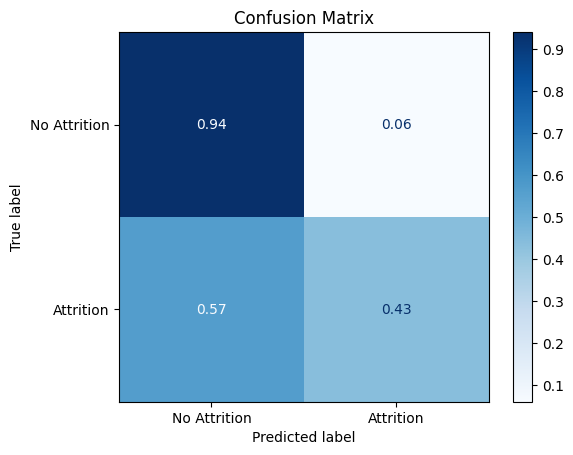

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

>> **NOTE:** Data pada dataset tidak menunjukkan korelasi yang signifikan, baik itu korelasi Positif ataupun Negatif. Data korelasi terbesar hanya 0.26 atau 26%, yaitu antara Attriction dengan OverTime. Hal tersebut akan mempengaruhi model kedepannya dalam melakukan prediksi dan akurasi prediksi akan rendah.

## Save Model

In [124]:
# Simpan model dalam format TensorFlow SavedModel
model.save("jjm_model")


INFO:tensorflow:Assets written to: jjm_model/assets


## Inference Test

### Setup

In [125]:
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

import pickle
import numpy as np

### Load Model and Parameter Scaling

In [126]:
# Memuat model dari folder SavedModel
model_path = "./jjm_model"  # Atau "attrition_model" jika format SavedModel digunakan
model = load_model(model_path)
print("Model loaded successfully.")

# Load scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
print("Scaler loaded successfully.")

Model loaded successfully.
Scaler loaded successfully.


In [136]:
# masukkan data dengan urutan 'Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'.

input_data = np.array([36, 2, 3, 1, 2, 2153, 0, 0, 8, 8, 1, 7])
input_data = scaler.transform([input_data])

In [137]:
# Lakukan prediksi menggunakan model
predictions = model.predict(input_data)
predicted_classes = (predictions > 0.5).astype(int)

# **4. Display Results**
for i, pred in enumerate(predicted_classes):
    result = "Attrition (1=True)" if pred[0] == 1 else "No Attrition (0=False)"
    print(f"Sample {i+1}: Predicted = {result}, Probability = {predictions[i][0]:.2f}")

1/1 [==============================] - 0s 19ms/step
Sample 1: Predicted = No Attrition (0=False), Probability = 0.00
